# Evaluating and Validating Machine Learning Models

## Evaluate Classification Models

In [ ]:
# Import the required libraries

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [ ]:
# Load the Breast Cancer data set

data = load_breast_cancer()
X, y = data.data, data.target
labels = data.target_names
feature_names = data.feature_names

In [ ]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
print(data.target_names)

['malignant' 'benign']


Standardize the data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Add noise

In [ ]:
# Add Gaussian noise to the data set
np.random.seed(42)  # For reproducibility
noise_factor = 0.5 # Adjust this to control the amount of noise
X_noisy = X_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)

# Load the original and noisy data sets into a DataFrame for comparison and visualization
df = pd.DataFrame(X_scaled, columns=feature_names)
df_noisy = pd.DataFrame(X_noisy, columns=feature_names)

In [ ]:
# Display the first few rows of the standardized original
# and noisy data sets for comparison

print("Original Data (First 5 rows):")
df.head()

Original Data (First 5 rows):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
print("\nNoisy Data (First 5 rows):")
df_noisy.head()


Noisy Data (First 5 rows):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.345421,-2.142467,1.593778,1.745890,1.451390,3.166446,3.442480,2.916193,1.982778,2.527027,...,2.619514,-1.472182,2.337365,1.288863,1.035495,2.672126,1.534030,2.483925,2.450303,1.791168
1,1.528967,0.572507,1.679206,1.379853,-0.415690,-1.097493,0.080586,-0.431691,-0.662701,-0.770222,...,1.967969,-0.561744,1.196665,2.196327,0.139888,0.035196,-0.566358,0.932478,-0.078258,0.768963
2,1.340301,0.363357,1.013336,0.960780,1.348473,1.731046,1.327473,2.538997,1.120503,-0.720568,...,1.402034,0.154582,2.086422,1.197149,0.123161,0.832054,1.312675,2.119376,0.887375,0.458025
3,-0.720371,0.738055,-0.943714,-0.928295,3.087499,2.671152,2.063957,1.582235,2.869940,4.793626,...,-1.240850,0.120727,-0.219824,0.681600,3.298094,4.044171,1.972232,1.591447,6.617453,5.310977
4,2.145813,-1.606510,2.477970,1.125304,0.573800,1.634568,0.875743,1.145344,0.040265,-0.814188,...,1.412305,-0.813199,0.534798,1.313041,0.350498,0.077517,-0.005297,0.069031,-0.607382,-0.248607


### Visualization

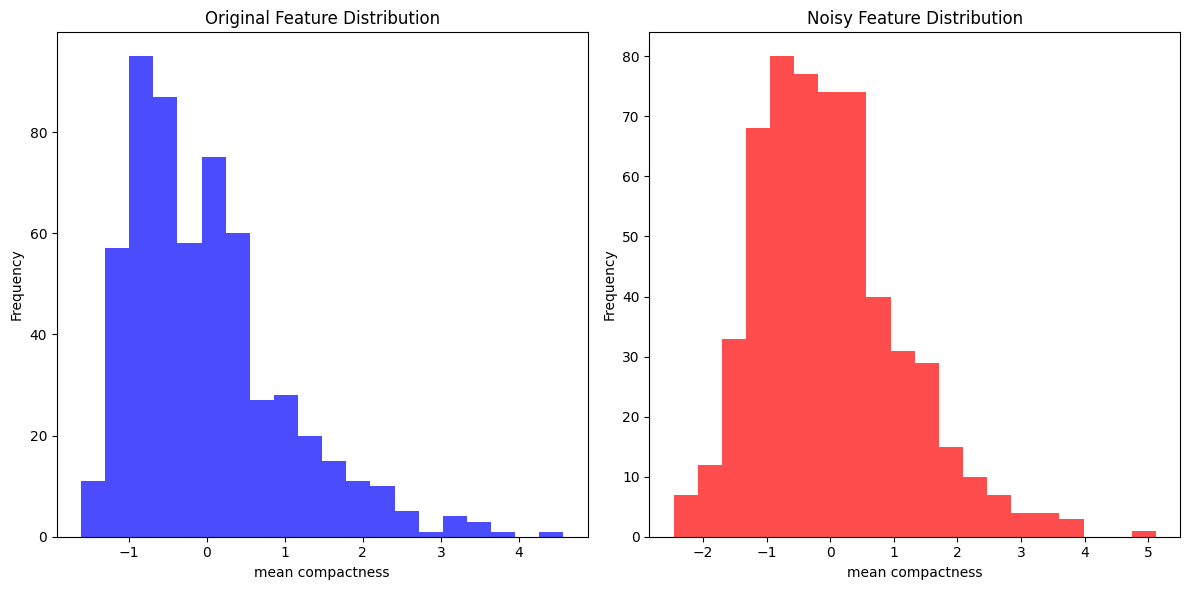

In [ ]:
# Histograms

plt.figure(figsize=(12, 6))

# Original Feature Distribution (Noise-Free)
plt.subplot(1, 2, 1)
plt.hist(df[feature_names[5]], bins=20, alpha=0.7, color='blue', label='Original')
plt.title('Original Feature Distribution')
plt.xlabel(feature_names[5])
plt.ylabel('Frequency')

# Noisy Feature Distribution
plt.subplot(1, 2, 2)
plt.hist(df_noisy[feature_names[5]], bins=20, alpha=0.7, color='red', label='Noisy')
plt.title('Noisy Feature Distribution')
plt.xlabel(feature_names[5])
plt.ylabel('Frequency')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

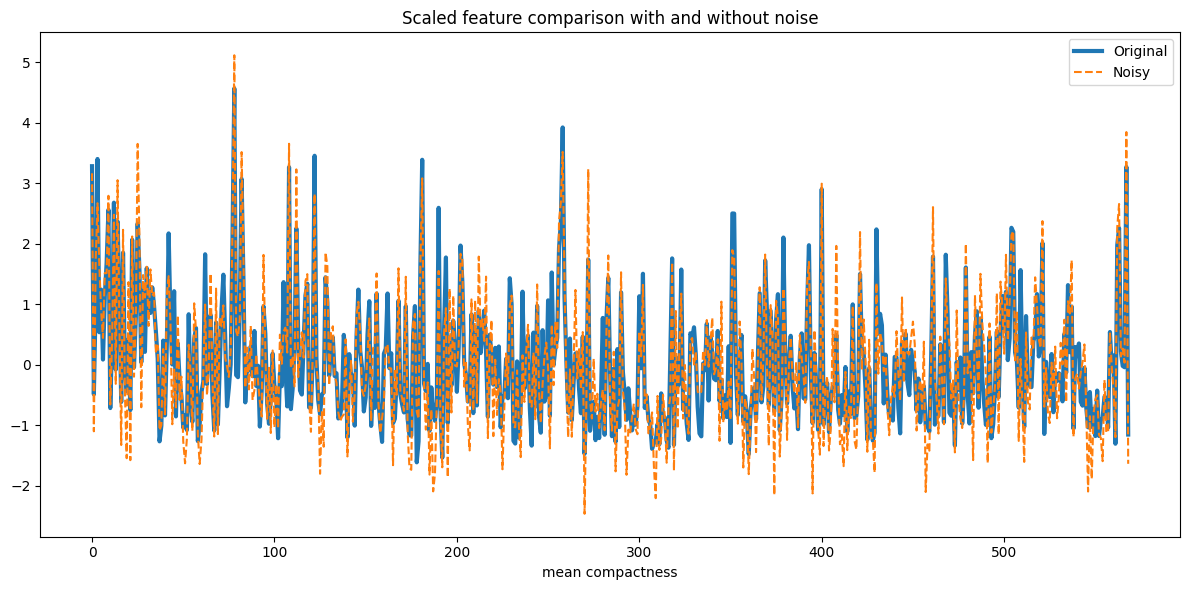

In [ ]:
# Plots

plt.figure(figsize=(12, 6))
plt.plot(df[feature_names[5]], label='Original',lw=3)
plt.plot(df_noisy[feature_names[5]], '--',label='Noisy',)
plt.title('Scaled feature comparison with and without noise')
plt.xlabel(feature_names[5])
plt.legend()
plt.tight_layout()
plt.show()

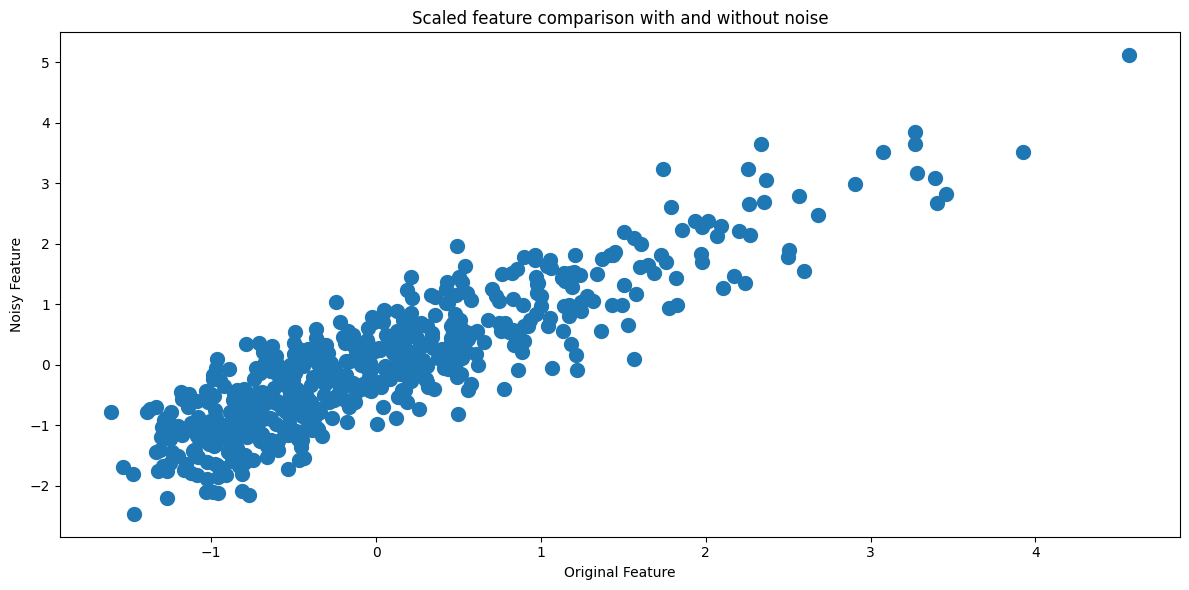

In [ ]:
# Scatterplot

plt.figure(figsize=(12, 6))
plt.scatter(df[feature_names[5]], df_noisy[feature_names[5]],lw=5)
plt.title('Scaled feature comparison with and without noise')
plt.xlabel('Original Feature')
plt.ylabel('Noisy Feature')
plt.tight_layout()
plt.show()

### Split the data, and fit the KNN and SVM models to the noisy training data

In [ ]:
# Split the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.3, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', C=1, random_state=42)

# Fit the models to the training data
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

### Evaluate the Model

In [ ]:
# Test

y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [ ]:
print(f"KNN Testing Accuracy: {accuracy_score(y_test, y_pred_knn):.3f}")
print(f"SVM Testing Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")

print("\nKNN Testing Data Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nSVM Testing Data Classification Report:")
print(classification_report(y_test, y_pred_svm))

KNN Testing Accuracy: 0.936
SVM Testing Accuracy: 0.971

KNN Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        63
           1       0.94      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


SVM Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



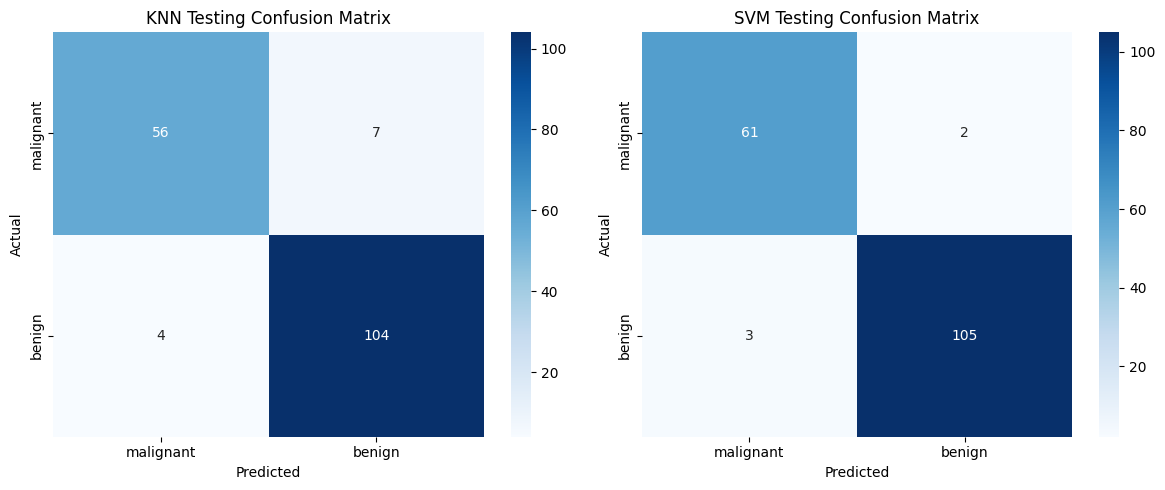

In [ ]:
# confusion matrices

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', ax=axes[0],
            xticklabels=labels, yticklabels=labels)

axes[0].set_title('KNN Testing Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', ax=axes[1],
            xticklabels=labels, yticklabels=labels)
axes[1].set_title('SVM Testing Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

**SVM** outperformed KNN in terms of precision, recall, and F1-score for both for the individual classes and their overall averages. This indicates that SVM is a stronger classifier. Although KNN performed quite well with an accuracy of 94%, SVM has better ability to correctly classify both malignant and beinign cases, with fewer errors. Given that the goal would be to choose the model with better generalization and fewer false negatives, SVM is certainly the preferred classifier.

## Evaluate Regression Models

In [ ]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import skew

### Data

In [ ]:
# Load the California Housing data set, included in scikit-learn to
# predict the median house price based on various attributes

data = fetch_california_housing()
X, y = data.data, data.target

In [ ]:
# Print the description of the California Housing data set

print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Explore

In [ ]:
eda = pd.DataFrame(data=X_train)
eda.columns = data.feature_names
eda['MedHouseVal'] = y_train
eda.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


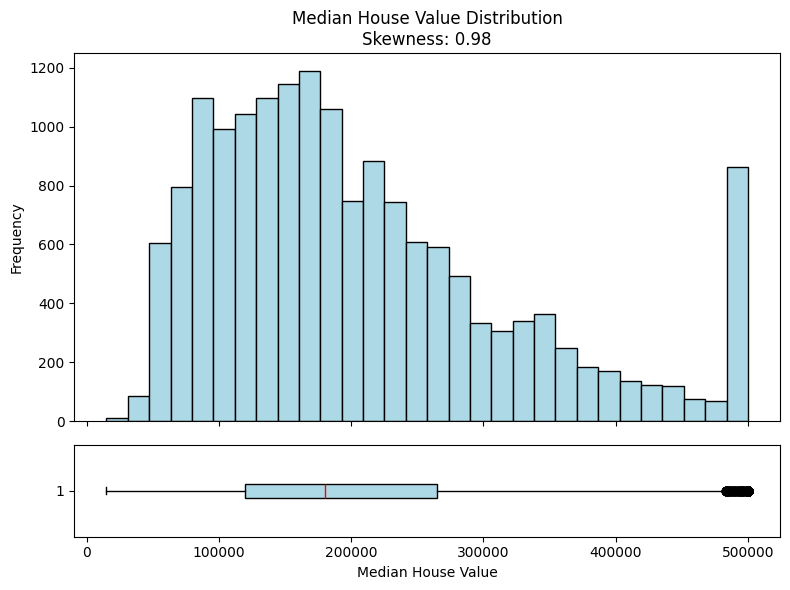

In [ ]:
# Scale the values
scaled_values = 1e5 * y_train

# Create figure with two subplots: one for histogram, one for boxplot
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(8, 6),
                               gridspec_kw={'height_ratios': [4, 1]})

# Histogram
ax1.hist(scaled_values, bins=30, color='lightblue', edgecolor='black')
ax1.set_title(f'Median House Value Distribution\nSkewness: {skew(y_train):.2f}')
ax1.set_ylabel('Frequency')

# Boxplot
ax2.boxplot(scaled_values, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'))
ax2.set_xlabel('Median House Value')

plt.tight_layout()
plt.show()

### Modeling

In [ ]:
# Initialize and fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on test set
y_pred_test = rf_regressor.predict(X_test)

### Evaluate

In [ ]:
# Estimate out-of-sample MAE, MSE, RMSE, and R²

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.3275
Mean Squared Error (MSE): 0.2554
Root Mean Squared Error (RMSE): 0.5053
R² Score: 0.8051


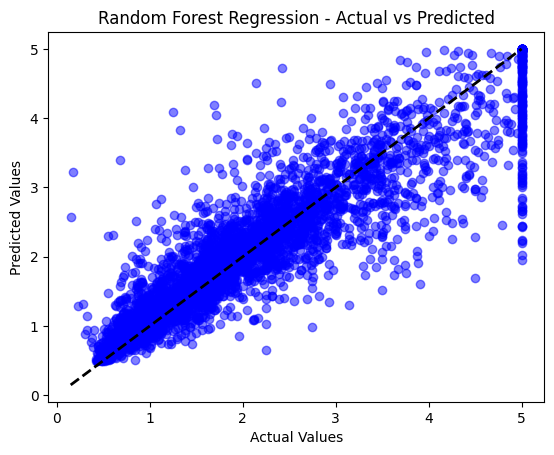

In [ ]:
# Plot Actual vs Predicted values

plt.scatter(y_test, y_pred_test, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression - Actual vs Predicted")
plt.show()

Average error = -1242
Standard deviation of error = 50518


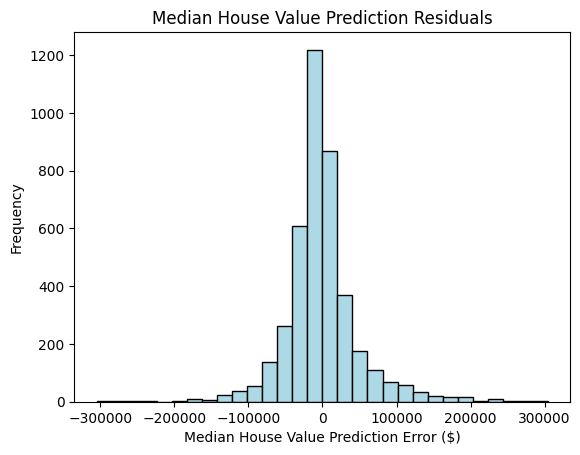

In [ ]:
# Calculate the residual errors
residuals = 1e5*(y_test - y_pred_test)

# Plot the histogram of the residuals
plt.hist(residuals, bins=30, color='lightblue', edgecolor='black')
plt.title(f'Median House Value Prediction Residuals')
plt.xlabel('Median House Value Prediction Error ($)')
plt.ylabel('Frequency')
print('Average error = ' + str(int(np.mean(residuals))))
print('Standard deviation of error = ' + str(int(np.std(residuals))))

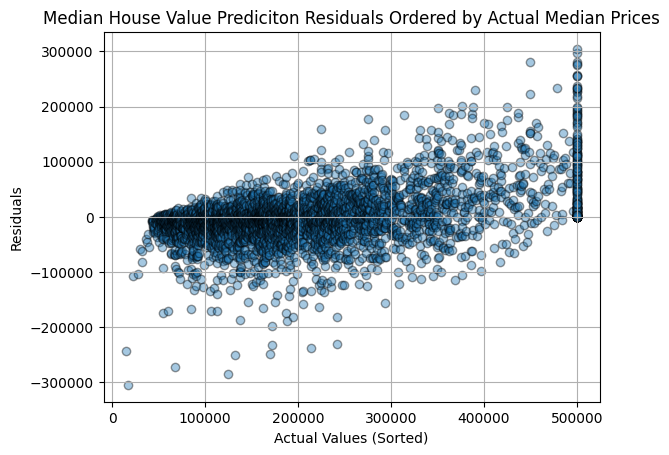

In [ ]:
# Plot the model residual errors by median house value.

# Create a DataFrame to make sorting easy
residuals_df = pd.DataFrame({
    'Actual': 1e5*y_test,
    'Residuals': residuals
})

# Sort the DataFrame by the actual target values
residuals_df = residuals_df.sort_values(by='Actual')

# Plot the residuals
plt.scatter(residuals_df['Actual'], residuals_df['Residuals'], marker='o', alpha=0.4,ec='k')
plt.title('Median House Value Prediciton Residuals Ordered by Actual Median Prices')
plt.xlabel('Actual Values (Sorted)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

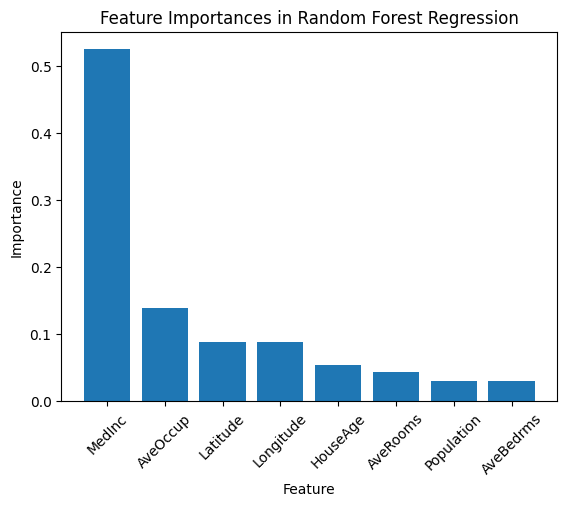

In [ ]:
# Display the feature importances as a bar chart.

# Feature importances
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
features = data.feature_names

# Plot feature importances
plt.bar(range(X.shape[1]), importances[indices],  align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in Random Forest Regression")
plt.show()

## Evaluate Unsupervised Models

In [ ]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Patch
from matplotlib import cm

### Clustering evaluation function
We'll define a function for evaluating the clustering models.
We'll include silhouette scores and the Davies-Bouldin index, plus generate a plot displaying the silhouette scores

In [ ]:
def evaluate_clustering(X, labels, n_clusters, ax=None, title_suffix=''):
    """
    Evaluate a clustering model using silhouette scores and the Davies-Bouldin index.

    Parameters:
    X (ndarray): Feature matrix.
    labels (array-like): Cluster labels assigned to each sample.
    n_clusters (int): The number of clusters in the model.
    ax: The subplot axes to plot on.
    title_suffix (str): Optional suffix for plot titlec

    Returns:
    None: Displays silhoutte scores and a silhouette plot.
    """
    if ax is None:
        ax = plt.gca()  # Get the current axis if none is provided

    # Calculate silhouette scores
    silhouette_avg = silhouette_score(X, labels)
    sample_silhouette_values = silhouette_samples(X, labels)

    # Plot silhouette analysis on the provided axis
    unique_labels = np.unique(labels)
    colormap = cm.tab10
    color_dict = {label: colormap(float(label) / n_clusters) for label in unique_labels}
    y_lower = 10
    for i in unique_labels:
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = color_dict[i]
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f'Silhouette Score for {title_suffix} \n' +
                 f'Average Silhouette: {silhouette_avg:.2f}')
    ax.set_xlabel('Silhouette Coefficient')
    ax.set_ylabel('Cluster')
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlim([-0.25, 1])  # Set the x-axis range to [0, 1]

    ax.set_yticks([])


### Clustering

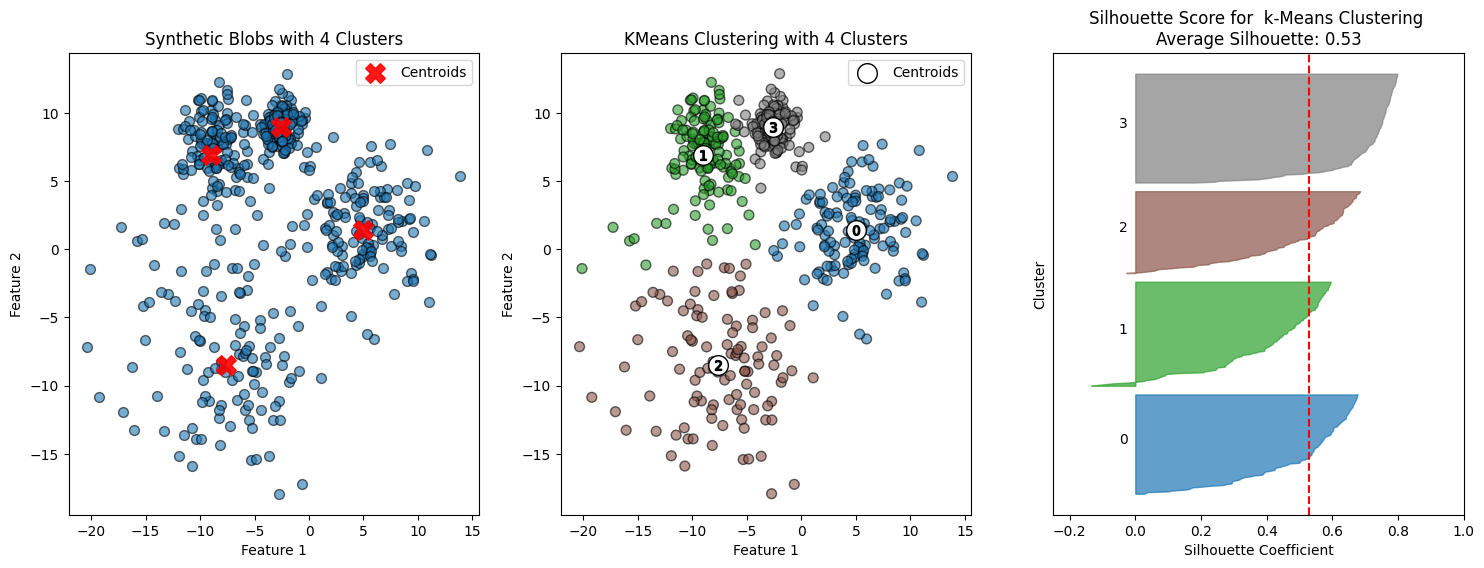

In [ ]:
# Create synthetic data with four blobs

X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=[1.0, 3, 5, 2], random_state=42)

# Apply KMeans clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X)

colormap = cm.tab10

# Plot the blobs
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.6, edgecolor='k')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', alpha=0.9, label='Centroids')
plt.title(f'Synthetic Blobs with {n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot the clustering result
# Create colors based on the predicted labels
colors = colormap(y_kmeans.astype(float) / n_clusters)

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=colors, s=50, alpha=0.6, edgecolor='k')

# Label the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
    label='Centroids'
)
# Label the custer number
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

plt.title(f'KMeans Clustering with {n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Evaluate the clustering
plt.subplot(1, 3, 3)
evaluate_clustering(X, y_kmeans, n_clusters, title_suffix=' k-Means Clustering')
plt.show()

**Cluster Stability**

To assess stability, we can measure inertia and repeatedly vary the random initialization of cluster centers to observe the impact of having different intitial centroid locations.

Inertia measures the compactness of clusters in K-means. It is defined as the sum of squared distances between each data point and its cluster centroid. Lower inertia values indicate more compact clusters and a potentially better clustering outcome. However, inertia tends to decrease as the number of clusters increases, so it's important to interpret it alongside other metrics.

To evaluate the stability of clustering, running k-means multiple times with different initial centroids by not fixing the random state helps determine if the algorithm consistently produces similar cluster assignments and inertia scores. Consistent inertia across runs suggests a stable solution that is less dependent on initial centroid positions.

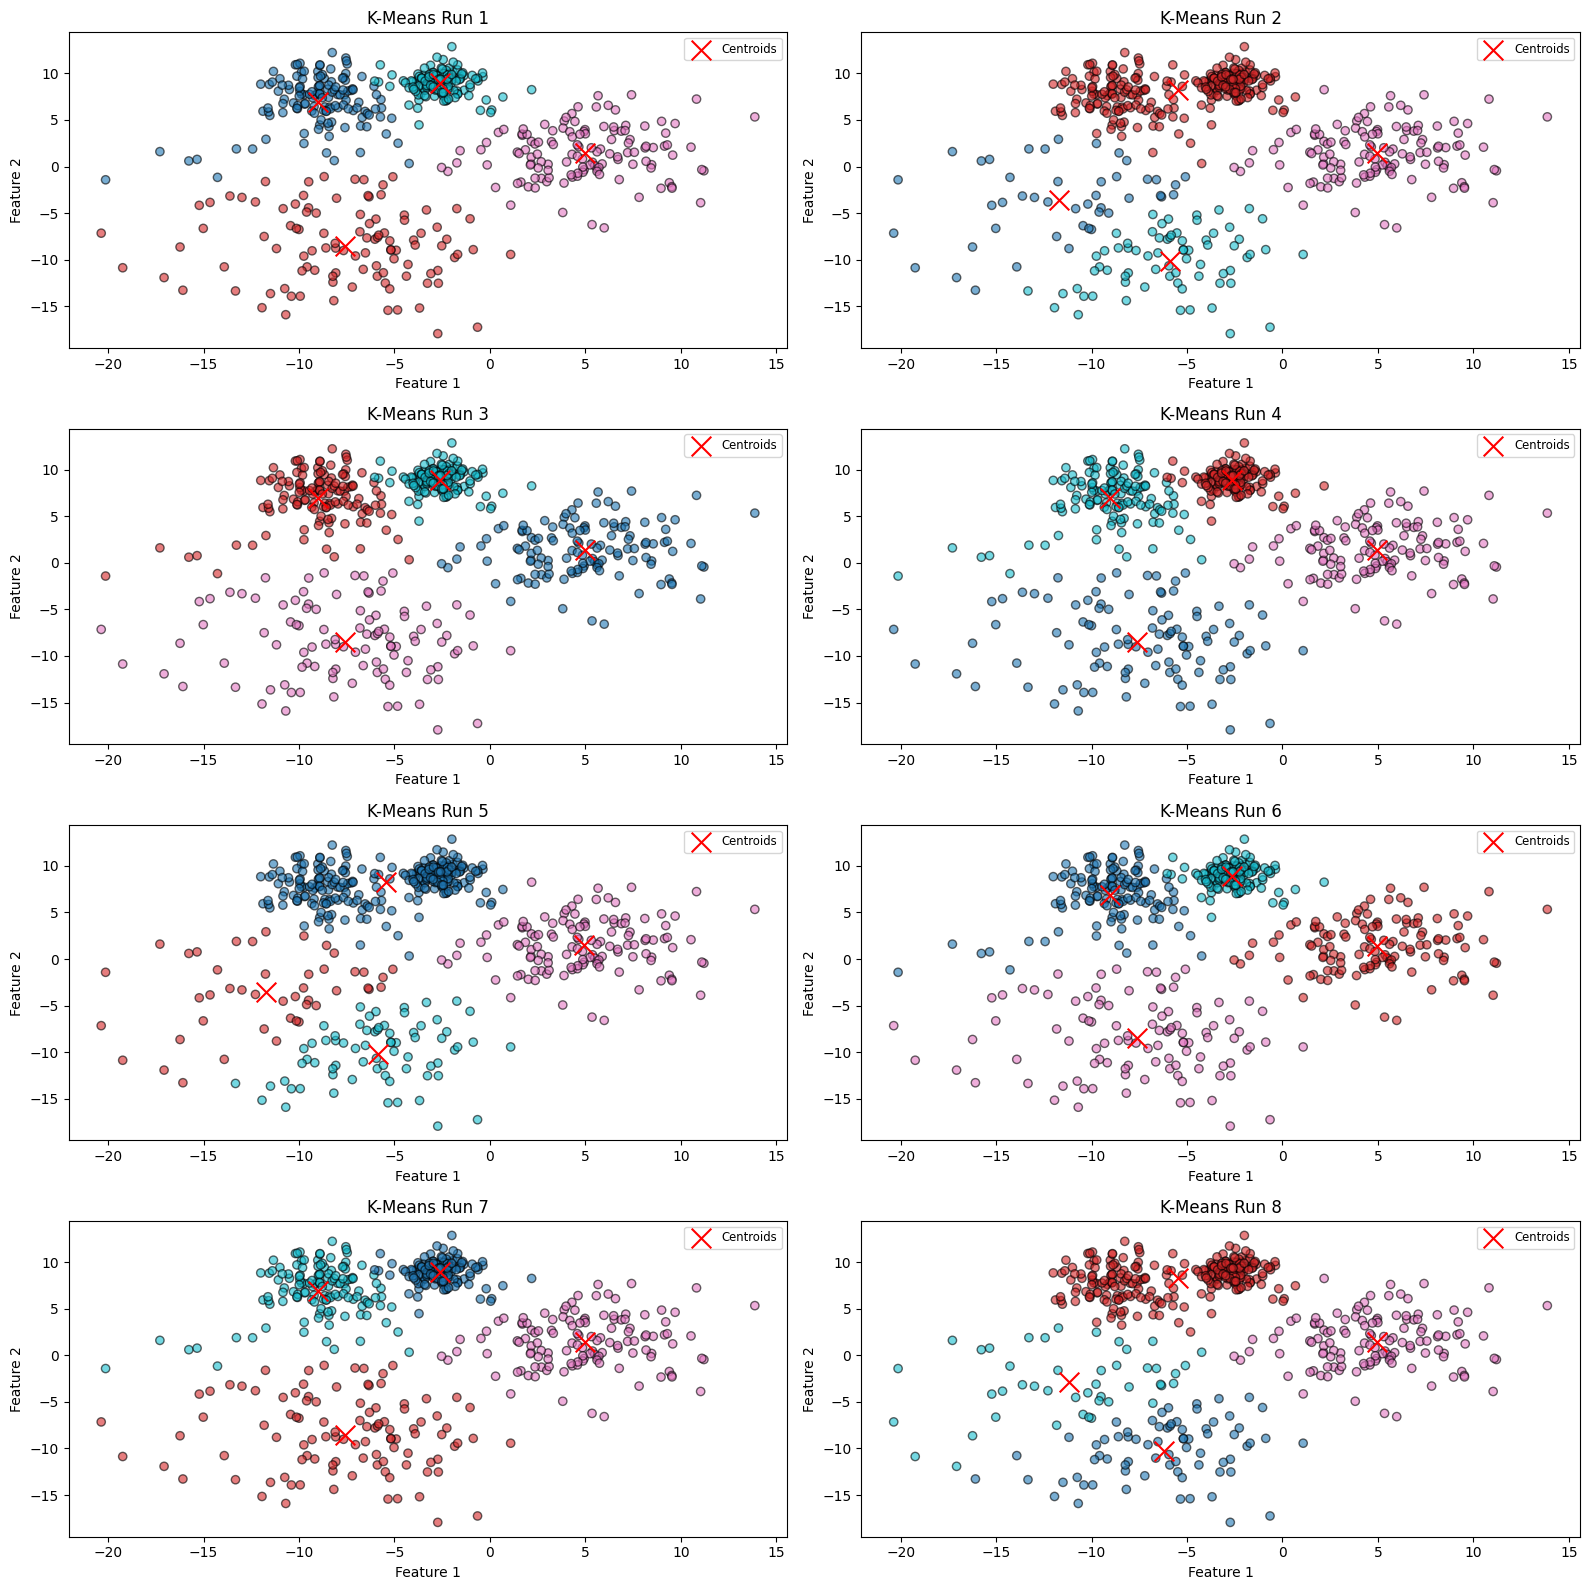

Run 1: Inertia=7633.51
Run 2: Inertia=8575.44
Run 3: Inertia=7633.51
Run 4: Inertia=7633.51
Run 5: Inertia=8575.44
Run 6: Inertia=7633.51
Run 7: Inertia=7633.51
Run 8: Inertia=8556.71


In [ ]:
# Number of runs for k-means with different random states
n_runs = 8
inertia_values = []

# Calculate number of rows and columns needed for subplots
n_cols = 2 # Number of columns
n_rows = -(-n_runs // n_cols) # Ceil division to determine rows
plt.figure(figsize=(16, 16)) # Adjust the figure size for better visualization

# Run K-Means multiple times with different random states
for i in range(n_runs):
    kmeans = KMeans(n_clusters=4, random_state=None)  # Use the default `n_init`
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

    # Plot the clustering result
    plt.subplot(n_rows, n_cols, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='tab10', alpha=0.6, edgecolor='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='x', label='Centroids')
    plt.title(f'K-Means Run {i + 1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()

# Print inertia values
for i, inertia in enumerate(inertia_values, start=1):
    print(f'Run {i}: Inertia={inertia:.2f}')

**Number of clusters**

Examine how varying the value of K affects key metrics such as inertia, the Davies-Bouldin index, and silhouette scores. By plotting these scores as a function of K, we can analyze the results and potentially gain insights into the optimal number of clusters for our data.

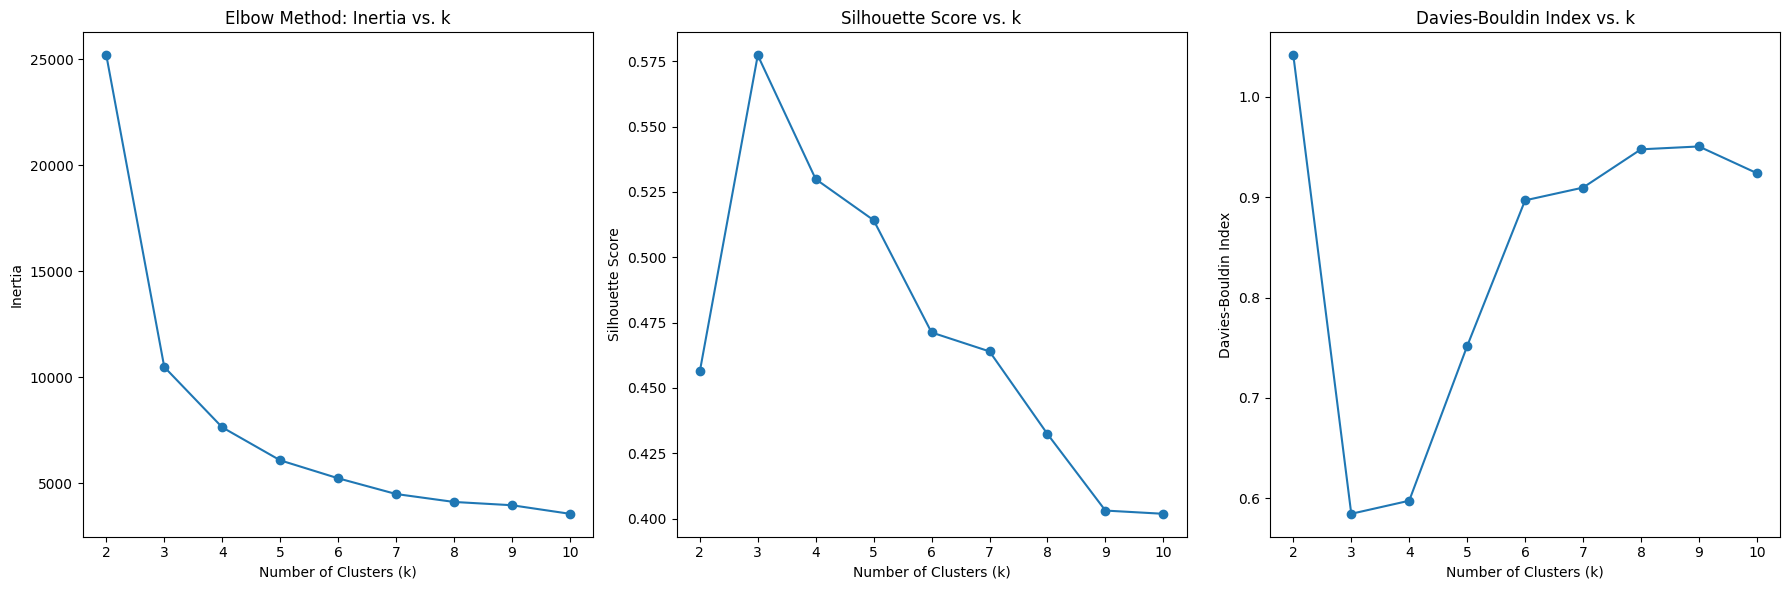

In [ ]:
# Range of k values to test
k_values = range(2, 11)

# Store performance metrics
inertia_values = []
silhouette_scores = []
davies_bouldin_indices = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    # Calculate and store metrics
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, y_kmeans))
    davies_bouldin_indices.append(davies_bouldin_score(X, y_kmeans))

# Plot the inertia values (Elbow Method)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method: Inertia vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot silhouette scores
plt.subplot(1, 3, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

# Plot Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(k_values, davies_bouldin_indices, marker='o')
plt.title('Davies-Bouldin Index vs. k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

The first plot is often used in the 'elbow method,' where the ideal value of k is chosen near the point where the curve starts to level off. Since inertia decreases as the number of clusters increases, it’s important to find the balance where adding more clusters provides diminishing returns in reducing inertia.
The inertia plot points to an optimal cluster number around 3 or 4. The silhouette score shows a clear peak at k = 3, while the Davies-Bouldin index reaches its lowest values between k = 3 and k = 4.

Overall, these metrics suggest that three clusters may be optimal, although we know that the true number of clusters in this case is actually four.

**Plot the blobs and the clustering results for k = 3, 4, and 5**

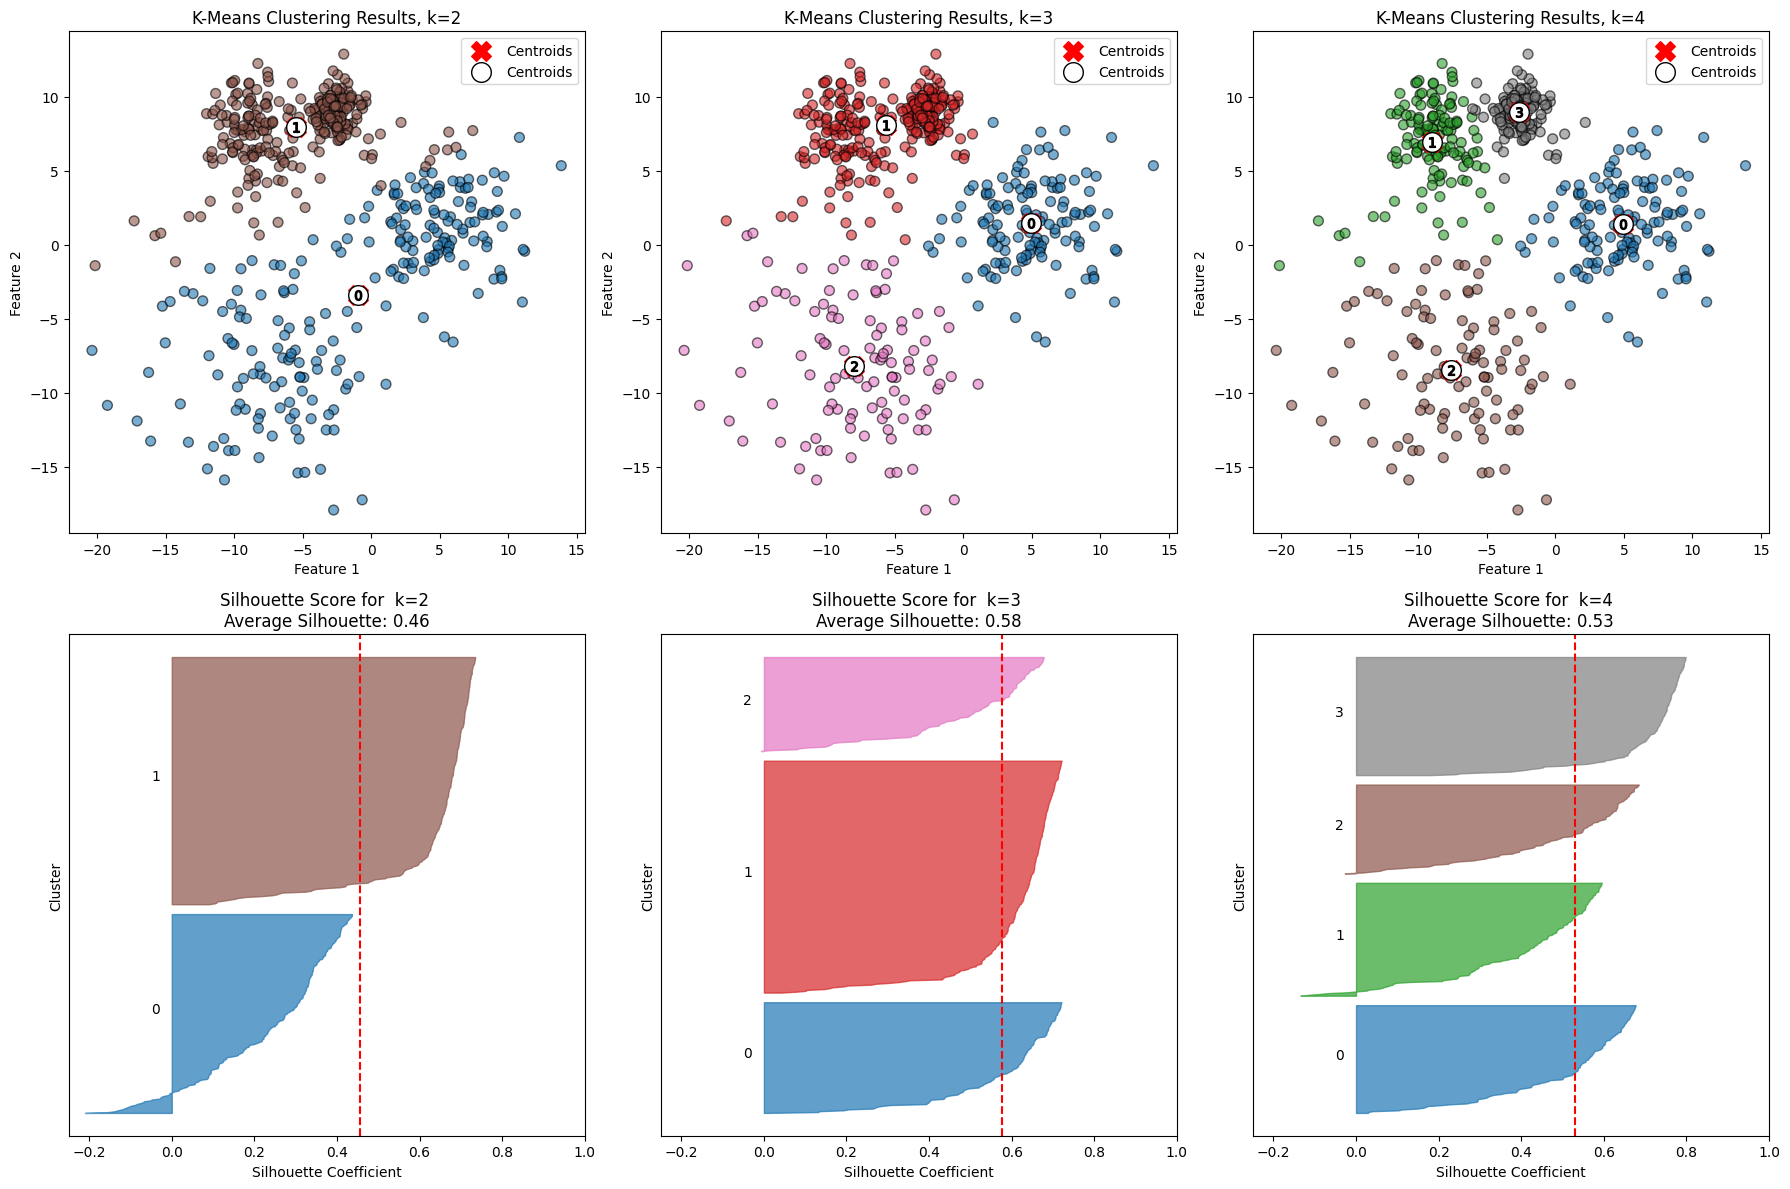

In [ ]:
plt.figure(figsize=(18, 12))
colormap = cm.tab10  # Define the colormap

for i, k in enumerate([2, 3, 4]):
    # Fit KMeans and predict labels
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    # Create colors based on the predicted labels
    colors = colormap(y_kmeans.astype(float) / k)

    # Scatter plot for each k in the first row (1, 2, 3)
    ax1 = plt.subplot(2, 3, i + 1)
    ax1.scatter(X[:, 0], X[:, 1], c=colors, s=50, alpha=0.6, edgecolor='k')
    ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    plt.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
        label='Centroids'
    )

    for i_, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker="$%d$" % i_, alpha=1, s=50, edgecolor="k")

    ax1.set_title(f'K-Means Clustering Results, k={k}')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.legend()

    # Silhouette plot for each k in the second row (4, 5, 6)
    ax2 = plt.subplot(2, 3, i + 4)
    evaluate_clustering(X, y_kmeans, k, ax=ax2, title_suffix=f' k={k}')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

## Regularization

In [1]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Function to display evaluation metrics

def regression_results(y_true, y_pred, regr_type):

    # Regression metrics
    ev = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print('Evaluation metrics for ' + regr_type + ' Linear Regression')
    print('explained_variance: ',  round(ev,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print()

In [3]:
# Generate Synthetic Data

# Generate synthetic data
noise=1
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + noise*np.random.randn(1000, 1)  # Linear relationship with some noise
y_ideal =  4 + 3 * X
# Specify the portion of the dataset to add outliers (e.g., the last 20%)
y_outlier = pd.Series(y.reshape(-1).copy())

# Identify indices where the feature variable X is greater than a certain threshold
threshold = 1.5  # Example threshold to add outliers for larger feature values
outlier_indices = np.where(X.flatten() > threshold)[0]

# Add outliers at random locations within the specified portion
num_outliers = 5  # Number of outliers to add
selected_indices = np.random.choice(outlier_indices, num_outliers, replace=False)

# Modify the target values at these indices to create outliers (add significant noise)
y_outlier[selected_indices] += np.random.uniform(50, 100, num_outliers)

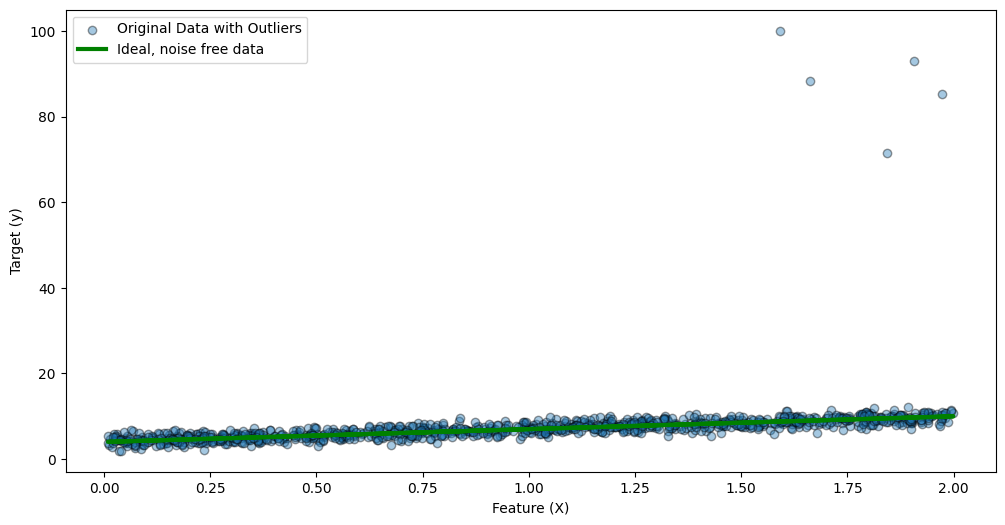

In [4]:
# Plot the data with outliers and the ideal fit line

plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y_outlier, alpha=0.4,ec='k', label='Original Data with Outliers')
plt.plot(X, y_ideal,  linewidth=3, color='g',label='Ideal, noise free data')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('')
plt.legend()
plt.show()


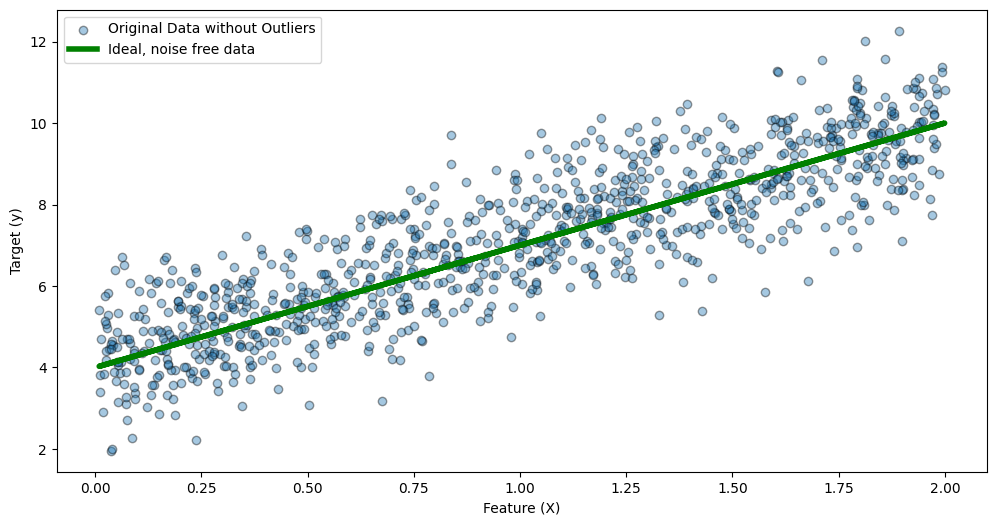

In [5]:
# Plot the data without the outliers and the ideal fit line

plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y, alpha=0.4,ec='k', label='Original Data without Outliers')
plt.plot(X, y_ideal,  linewidth=4, color='g',label='Ideal, noise free data')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('')
plt.legend()
plt.show()

### Fit Ordinary, Ridge, and Lasso regression models

In [6]:
# Fit a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y_outlier)
y_outlier_pred_lin = lin_reg.predict(X)

# Fit a ridge regression model (regularization to control large coefficients)
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y_outlier)
y_outlier_pred_ridge = ridge_reg.predict(X)

# Fit a lasso regression model (regularization to control large coefficients)
lasso_reg = Lasso(alpha=.2)
lasso_reg.fit(X, y_outlier)
y_outlier_pred_lasso = lasso_reg.predict(X)

In [7]:
# Print the regression results

regression_results(y, y_outlier_pred_lin, 'Ordinary')
regression_results(y, y_outlier_pred_ridge, 'Ridge')
regression_results(y, y_outlier_pred_lasso, 'Lasso')

Evaluation metrics for Ordinary Linear Regression
explained_variance:  0.6748
r2:  0.6357
MAE:  0.9468
MSE:  1.4164
RMSE:  1.1901

Evaluation metrics for Ridge Linear Regression
explained_variance:  0.6766
r2:  0.6375
MAE:  0.9443
MSE:  1.4094
RMSE:  1.1872

Evaluation metrics for Lasso Linear Regression
explained_variance:  0.7394
r2:  0.7003
MAE:  0.8597
MSE:  1.1651
RMSE:  1.0794



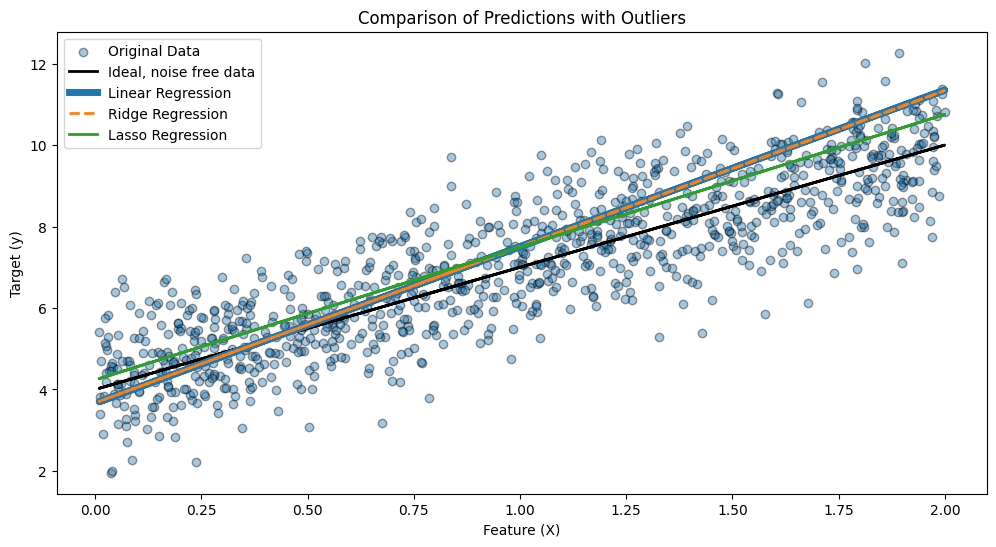

In [8]:
# Plot the data and the predictions for comparison

plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y, alpha=0.4,ec='k', label='Original Data')

# Plot the ideal regression line (noise free data)
plt.plot(X, y_ideal,  linewidth=2, color='k',label='Ideal, noise free data')

# Plot predictions from the simple linear regression model
plt.plot(X, y_outlier_pred_lin,  linewidth=5, label='Linear Regression')

# Plot predictions from the ridge regression model
plt.plot(X, y_outlier_pred_ridge, linestyle='--', linewidth=2, label='Ridge Regression')

# Plot predictions from the lasso regression model
plt.plot(X, y_outlier_pred_lasso,  linewidth=2, label='Lasso Regression')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Comparison of Predictions with Outliers')
plt.legend()
plt.show()